In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-rootproblem-bessel)

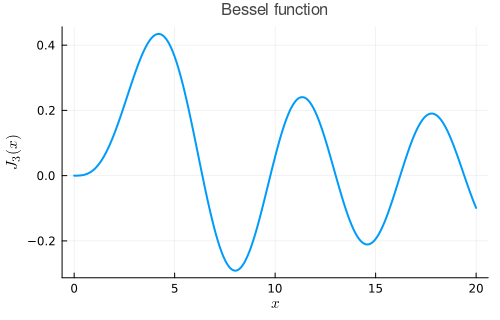

In [2]:
using SpecialFunctions
J₃(x) = besselj(3, x)
plot(J₃, 0, 20;
    title="Bessel function",
    xaxis=(L"x"),  yaxis=(L"J_3(x)"),  grid=:xy)

From the graph we see roots near 6, 10, 13, 16, and 19. We use `nlsolve` from the `NLsolve` package to find these roots accurately. It uses vector variables, so we have to code accordingly.
```{tip}
:class: dropdown
Type `\omega` followed by <kbd>Tab</kbd> to get the character `ω`.
The argument `ftol=1e-14` below is called a **keyword argument**. Here it sets a goal for the maximum value of $|f(x)|$.
```

In [3]:
using NLsolve
ω = []
for guess = [6., 10. ,13., 16., 19.]
    s = nlsolve(x -> J₃(x[1]), [guess], ftol=1e-14)
    append!(ω, s.zero)
end

In [4]:
y = J₃.(ω)
@pt :header=["root estimate", "function value"] [ω y]

root estimate,function value
6.38016,2.47025e-15
9.76102,0.0
13.0152,-2.77556e-17
16.2235,6.93889e-18
19.4094,-9.71445e-17


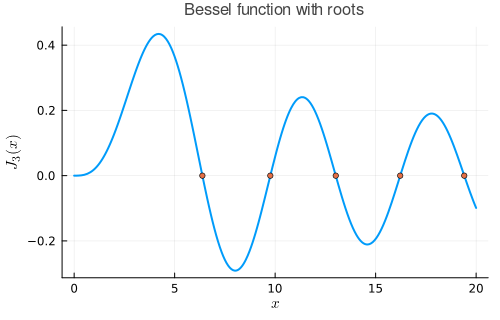

In [5]:
scatter!(ω, y, title="Bessel function with roots")

If instead we seek values at which $J_3(x)=0.2$, then we must find roots of the function $J_3(x)-0.2$.

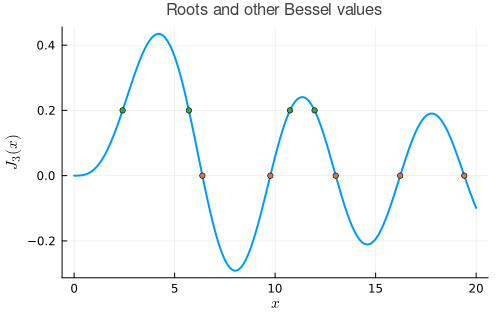

In [6]:
r = []
for guess = [3., 6., 10., 13.]
    f(x) = J₃(x[1]) - 0.2
    s = nlsolve(f, [guess], ftol=1e-14)
    append!(r, s.zero)
end
scatter!(r, J₃.(r), title="Roots and other Bessel values")